http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 

In [1]:
import numpy as np  
import pandas as pd 
import math

In [2]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
clusters = pd.read_csv("../../crimesInChicagoData/Unsupervised-MachineLearning/finalProject/year2001_50clusters.csv")

In [4]:
clusters.head()

,Unnamed: 0,index,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour,index.1,clusters_50
0,0,6,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,5.0,2001.0,1,1,11,0,10
1,1,17,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,True,False,8.0,2001.0,1,1,0,1,4
2,2,18,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,9.0,2001.0,1,1,0,2,26
3,3,20,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,7.0,2001.0,6,16,8,3,42
4,4,25,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,15.0,2001.0,6,1,8,4,7


In [5]:
clusters = clusters.drop(['Unnamed: 0', 'index'], axis =1 )

In [6]:
clusters 

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour,index.1,clusters_50
0,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,5.0,2001.0,1,1,11,0,10
1,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,True,False,8.0,2001.0,1,1,0,1,4
2,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,9.0,2001.0,1,1,0,2,26
3,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,7.0,2001.0,6,16,8,3,42
4,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,15.0,2001.0,6,1,8,4,7
5,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,14.0,2001.0,7,25,10,5,0
6,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,7.0,2001.0,6,23,20,6,42
7,0842,THEFT,AGG: FINANCIAL ID THEFT,OTHER,False,False,8.0,2001.0,1,1,0,7,26
8,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,4.0,2001.0,5,1,0,8,30
9,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,7.0,2001.0,10,1,0,9,1


In [7]:
clusters.shape

(568517, 13)

# Training and Test Data Subset 

In [8]:
import random 
random.seed(1)

In [9]:
msk = np.random.rand(len(clusters)) < 0.7

In [10]:
train = clusters[msk]

In [11]:
test = clusters[~msk]

In [12]:
len(train)

398322

In [13]:
len(test)

170195

# Train Text? 

In [14]:
train_x = train['Description'].values

In [15]:
train_y = train['clusters_50'].values

KeyError: 'clusters_5'

In [ ]:
test_x = test['Description'].values

In [ ]:
test_y = test['clusters_50'].values

# Tokenizing text with scikit-learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer()

In [ ]:
train_counts = count_vect.fit_transform(train_x)

In [ ]:
train_counts.shape

In [ ]:
type(train_counts)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer()

In [ ]:
train_x_tfidf = tfidf_transformer.fit_transform(train_counts)

In [ ]:
train_x_tfidf.shape

In [ ]:
test_counts = count_vect.transform(test_x)

In [ ]:
test_x_tfidf = tfidf_transformer.transform(test_counts)

# Training a Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
clf = MultinomialNB().fit(train_x_tfidf, train_y)

In [ ]:
predicted = clf.predict(test_x_tfidf)

In [ ]:
for test_row, cluster in zip(test_x, predicted): 
    print('%r => %s' % (test_row, train_y[cluster]))

# Evaluation of the Performance on the Test Set

In [33]:
np.mean(predicted == test_y)

0.77565923158455674

We achieve 77.3% accuracy. 

# SVM Machine to Improve Performance on Test Set

In [34]:
from sklearn.linear_model import SGDClassifier 

In [35]:
svm_clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)

In [36]:
svm_clf.fit(train_x_tfidf, train_y)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [37]:
svm_clf.coef_

array([[ -2.41384933e-01,   2.82176851e-03,  -8.83557664e-03, ...,
         -1.79563539e-02,   4.30356932e-18,  -1.21504213e-02],
       [  4.46522727e-03,   4.79700647e-03,  -2.55668298e-04, ...,
         -1.06938594e-02,  -2.52037989e-03,  -9.41657655e-03],
       [  4.23408609e-01,   2.41543385e-01,   8.83557664e-03, ...,
          3.56461979e-03,  -4.30356932e-18,  -1.21504213e-02],
       [  2.62660428e-03,   0.00000000e+00,  -8.83557664e-03, ...,
         -1.84227460e-03,  -7.56113966e-04,   0.00000000e+00],
       [ -8.66779411e-03,  -1.89058490e-02,  -8.83557664e-03, ...,
         -2.15876011e-02,  -2.52037989e-03,   1.21504213e-02]])

In [38]:
svm_predicted = svm_clf.predict(test_x_tfidf)

In [39]:
np.mean(svm_predicted == test_y)

0.77783763841960096

We improved our performance by 0.5% which seems pretty insignificant

In [40]:
from sklearn import metrics

In [41]:
print(metrics.classification_report(test_y, svm_predicted, target_names = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']))

             precision    recall  f1-score   support

   cluster0       0.78      0.81      0.80     57900
   cluster1       0.83      0.80      0.82     47787
   cluster2       0.76      0.82      0.79     29364
   cluster3       0.75      0.78      0.76     19087
   cluster4       0.67      0.52      0.58     16629

avg / total       0.78      0.78      0.78    170767



The SVM model can predict which cluster the observation belongs to by analyzing the content of the Description with an average accuracy of 78%. The model seems to perform better in general for cluster 1 and the least for cluster4.

In [42]:
metrics.confusion_matrix(test_y, svm_predicted)

array([[47099,  3953,  3034,  1910,  1904],
       [ 4352, 38219,  2893,  1285,  1038],
       [ 2234,  1615, 24072,   797,   646],
       [ 2627,   552,   459, 14853,   596],
       [ 4221,  1618,  1285,   919,  8586]])

# Grid Search Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': (1e-2, 1e-3)}

In [44]:
gs_clf = GridSearchCV(svm_clf, parameters)

In [45]:
gs_clf = gs_clf.fit(train_counts, train_y)

In [46]:
gs_clf

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': (0.01, 0.001)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [47]:
gs_clf.best_params_

{'alpha': 0.01}

In [48]:
gs_clf.best_score_

0.77449151477058453

After tuning, the accuracy "improves" to 77.4%. But this alpha is essentially the same as the alpha we used earlier. So we will not tune it as it will not produce different results. 

# Visualizing The Results
https://buhrmann.github.io/tfidf-analysis.html

In [49]:
features=count_vect.get_feature_names()

In [50]:
features

['10',
 '10gm',
 '18',
 '300',
 '30gms',
 '500',
 'abduction',
 'abuse',
 'act',
 'action',
 'add',
 'adult',
 'against',
 'age',
 'agg',
 'aggravated',
 'aid',
 'aiding',
 'air',
 'airport',
 'alarm',
 'alike',
 'alter',
 'ammo',
 'ammunition',
 'amphetamines',
 'amusement',
 'an',
 'and',
 'app',
 'armed',
 'arson',
 'asslt',
 'att',
 'attempt',
 'automobile',
 'bail',
 'barbituates',
 'battery',
 'bigamy',
 'bike',
 'black',
 'bogus',
 'boli',
 'bolita',
 'bomb',
 'bond',
 'bookmaking',
 'bribery',
 'brn',
 'building',
 'burglary',
 'bus',
 'business',
 'buy',
 'by',
 'cab',
 'call',
 'calls',
 'cannabis',
 'card',
 'cards',
 'cash',
 'charitable',
 'check',
 'child',
 'cocaine',
 'coin',
 'compounds',
 'computer',
 'concealing',
 'conduct',
 'confidence',
 'conspiracy',
 'consumption',
 'cont',
 'contribute',
 'counterfeit',
 'counterfeiting',
 'crack',
 'credit',
 'crim',
 'crime',
 'criminal',
 'cut',
 'cutting',
 'cycle',
 'dang',
 'dangerous',
 'dealer',
 'deface',
 'defacement

In [51]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [52]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [53]:
train

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour,index.1,clusters_5
0,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,5.0,2001.0,1,1,11,0,1
1,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,True,False,8.0,2001.0,1,1,0,1,4
2,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,9.0,2001.0,1,1,0,2,3
3,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,7.0,2001.0,6,16,8,3,2
4,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,15.0,2001.0,6,1,8,4,1
5,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,14.0,2001.0,7,25,10,5,0
6,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,7.0,2001.0,6,23,20,6,0
7,0842,THEFT,AGG: FINANCIAL ID THEFT,OTHER,False,False,8.0,2001.0,1,1,0,7,0
10,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,True,False,22.0,2001.0,1,1,0,10,4
12,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESIDENCE,False,False,12.0,2001.0,11,9,9,12,4


In [54]:
train.iloc[5]

IUCR                                             0840
Primary Type                                    THEFT
Description             FINANCIAL ID THEFT: OVER $300
Location Description                        RESIDENCE
Arrest                                          False
Domestic                                         True
District                                           14
Year                                             2001
Month                                               7
Day                                                25
Hour                                               10
index.1                                             5
clusters_5                                          0
Name: 5, dtype: object

In [55]:
top_feats_in_doc(train_x_tfidf, features, 5,10)

,feature,tfidf
0,300,0.503727
1,id,0.500838
2,financial,0.500192
3,theft,0.392070
4,over,0.302505
5,feet,0.000000
6,equip,0.000000
7,elderly,0.000000
8,electronic,0.000000
9,embezzlement,0.000000


In [56]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [57]:
topFeats = top_mean_feats(train_x_tfidf, features )

In [58]:
topFeats

,feature,tfidf
0,simple,0.203445
1,500,0.106276
2,to,0.083818
3,under,0.077592
4,and,0.077497
5,over,0.055929
6,vehicle,0.048150
7,property,0.047754
8,automobile,0.046665
9,poss,0.041661


In [59]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [60]:
dfs = top_feats_by_class(train_x_tfidf, train_y, features)

In [61]:
 dfs

[       feature     tfidf
 0          500  0.306018
 1        under  0.229593
 2          and  0.229509
 3         over  0.152192
 4   automobile  0.084433
 5        entry  0.041911
 6     forcible  0.034865
 7           to  0.026833
 8     property  0.026166
 9      handgun  0.025679
 10  aggravated  0.022053
 11      simple  0.021155
 12       armed  0.020277
 13      weapon  0.018953
 14       theft  0.018592
 15    unlawful  0.014818
 16   strongarm  0.013346
 17       other  0.013280
 18          no  0.013276
 19        land  0.010853
 20     attempt  0.009616
 21   financial  0.008377
 22          id  0.008366
 23         300  0.008102
 24    recovery  0.007833,        feature     tfidf
 0       simple  0.684343
 1   aggravated  0.050900
 2        other  0.030118
 3       weapon  0.029883
 4         dang  0.027619
 5   automobile  0.027274
 6           to  0.026623
 7      handgun  0.025337
 8     property  0.022485
 9        entry  0.017715
 10    forcible  0.014461
 11        l

In [62]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

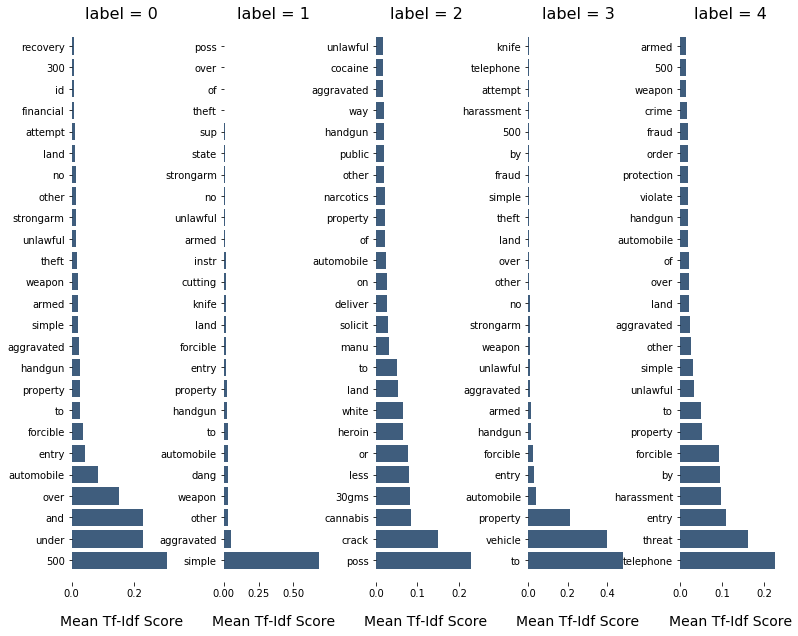

In [63]:
plot_tfidf_classfeats_h(dfs)

In [64]:
centroidsLabels = pd.read_csv("../../crimesInChicagoData/Unsupervised-MachineLearning/finalProject/year2001_50clusterCentroids.csv") 

In [66]:
centroidsLabels

,Unnamed: 0,index,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
0,0,32,820,THEFT,$500 AND UNDER,STREET,False,False,8.0,2001.0,10,15,22
1,1,6,460,BATTERY,SIMPLE,STREET,False,False,2.0,2001.0,3,1,19
2,2,1551,2027,NARCOTICS,POSS: CRACK,STREET,True,False,11.0,2001.0,2,27,20
3,3,18,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,3.0,2001.0,11,1,14
4,4,132,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,6.0,2001.0,1,9,17
